 Ce script génère des données artificiel et les appliques à un modèle LSTM. 


In [132]:
# Ce script génère des données artificiel et les appliques à un modèle LSTM. 


import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

from keras.layers import  Dense, LSTM, Dropout
from keras.models import Sequential
from keras.callbacks import CSVLogger

import matplotlib.pyplot as plt

### Generate sample data

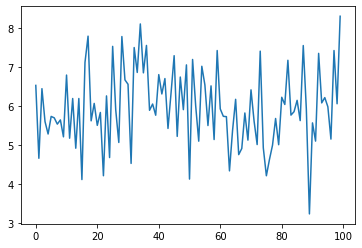

In [5]:

data = np.ndarray((4,100))
for i in range(4):  
    data[i]=np.random.normal(6, 1, 100)

data =data.transpose()
df = pd.DataFrame(data)

df[0].plot()
# df[1].plot()
# df[2].plot()

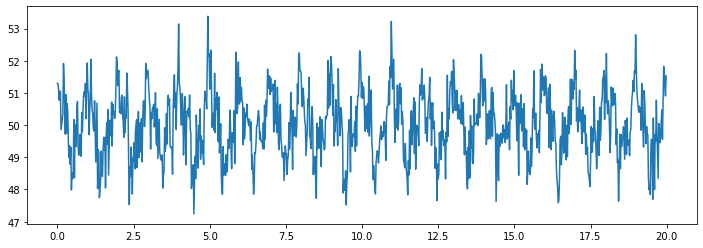

In [109]:
import random
import math
from matplotlib.pyplot import *

def aleaGauss(mu,sigma):
    return random.gauss(mu,sigma)

def signal(t):
    return 1.0*math.cos(2*math.pi*t)+0.5*math.cos(6*math.pi*t+math.pi/3)

N=1000
T = 20
dt = T/N
y = np.zeros((5,N))
t = np.zeros(N)
mu = 85
sigma =0.6
for k in range(N):
    t[k] = k*dt
    y[0][k] = signal(t[k])+aleaGauss(85,sigma)
    y[1][k] = signal(t[k])+aleaGauss(30,sigma)
    y[2][k] = signal(t[k])+aleaGauss(100,sigma)
    y[3][k] = signal(t[k])+aleaGauss(50,sigma)
    if (t[k]%1 == 0):
         y[4][(k-5):(k+6)]=1
figure(figsize=(12,4))
plot(t,y[3])


In [135]:
data= pd.DataFrame(np.transpose(y))
data.columns = ["gsr","heart_rate","skin_temp","calories","risk_situation"]
data.risk_situation = data.risk_situation.astype(int)
targets = data.pop("risk_situation")

X_train, X_val, y_train, y_val = train_test_split(data.values,
                targets, test_size=0.2, random_state=0)

X_train, X_test, y_train, y_test = train_test_split(X_train,
                y_train, test_size=0.125, random_state=0)

print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)
print(X_test.shape, y_test.shape)


trainX = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
testX = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))
X_val = np.reshape(X_val, (X_val.shape[0], 1, X_val.shape[1]))

(700, 4) (700,)
(200, 4) (200,)
(100, 4) (100,)


In [136]:
from keras.optimizers import SGD
opt = SGD(lr=0.001)
# create and fit the LSTM network
print("Building model...")
model = Sequential()
model.add(LSTM(100,input_shape=(1, 4)))
model.add(Dropout(0.2))
model.add(Dense(1, activation='softmax'))

# model.compile(loss='mean_squared_error', optimizer='adam',metrics=['accuracy'])
# model.compile(loss='mean_squared_error', optimizer=opt,metrics=['accuracy'])
model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])

model.summary()

print("Training...")
# history = LossHistory()
csv_logger = CSVLogger('log.csv', append=False, separator=';')
h = model.fit(trainX, y_train, epochs=50, batch_size=200, verbose=2,callbacks=[csv_logger],validation_data=(X_val, y_val))

Building model...
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_10 (LSTM)               (None, 100)               42000     
_________________________________________________________________
dropout_3 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 101       
Total params: 42,101
Trainable params: 42,101
Non-trainable params: 0
_________________________________________________________________
Training...
Train on 700 samples, validate on 200 samples
Epoch 1/50
 - 1s - loss: 12.7311 - acc: 0.2014 - val_loss: 12.5148 - val_acc: 0.2150
Epoch 2/50
 - 0s - loss: 12.7311 - acc: 0.2014 - val_loss: 12.5148 - val_acc: 0.2150
Epoch 3/50
 - 0s - loss: 12.7311 - acc: 0.2014 - val_loss: 12.5148 - val_acc: 0.2150
Epoch 4/50
 - 0s - loss: 12.7311 - acc: 0.2014 - val_loss: 12.5148 - va

0.2150000035762787
0


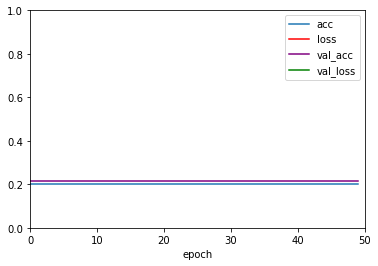

In [126]:
print(max(h.history['val_acc']))
print(h.history['val_acc'].index(max(h.history['val_acc'])))
      
log = pd.read_csv('log.csv',sep=';')
ax = plt.gca()

ax.set_ylim([0,1])
ax.set_xlim([0,50])

log.plot(kind='line',x='epoch',y='acc',ax=ax)
log.plot(kind='line',x='epoch',y='loss', color='red', ax=ax)

log.plot(kind='line',x='epoch',y='val_acc',color='purple',ax=ax)
log.plot(kind='line',x='epoch',y='val_loss', color='green', ax=ax)

plt.show()

In [127]:
from sklearn.metrics import classification_report

y_pred = model.predict_classes(testX)
y_test_rounded = np.argmax(y_test,axis=1)

# print(y_test)
# print(y_test)
# 
print(classification_report(y_test, y_pred))

from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

             precision    recall  f1-score   support

        0.0       0.00      0.00      0.00        75
        1.0       0.25      1.00      0.40        25

avg / total       0.06      0.25      0.10       100



C:\Users\paulj\AppData\Roaming\Python\Python36\site-packages\numpy\core\fromnumeric.py:56: FutureWarning: 'argmax' is deprecated, use 'idxmax' instead. The behavior of 'argmax'
will be corrected to return the positional maximum in the future.
Use 'series.values.argmax' to get the position of the maximum now.
  return getattr(obj, method)(*args, **kwds)
C:\Users\paulj\AppData\Roaming\Python\Python36\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


array([[ 0, 75],
       [ 0, 25]], dtype=int64)